Andrew Plum

CS 479

4/30/2024

In [67]:
# Import packages

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import logit
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import export_text


In [2]:
# Read the CSV file into a dataframe

original_strava_df = pd.read_csv('strava.csv')
strava_df = original_strava_df
strava_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799 entries, 0 to 1798
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  1799 non-null   int64  
 1   name                                1799 non-null   object 
 2   distance                            1799 non-null   float64
 3   average_grade                       1799 non-null   float64
 4   maximum_grade                       1799 non-null   float64
 5   elevation_high                      1799 non-null   float64
 6   elevation_low                       1799 non-null   float64
 7   start_latlng                        1799 non-null   object 
 8   end_latlng                          1799 non-null   object 
 9   elevation_profile                   1799 non-null   object 
 10  climb_category                      1799 non-null   int64  
 11  city                                1730 no

In [3]:
# Create the 'star_rate' column

strava_df['star_rate'] = strava_df['star_count'] / strava_df['athlete_count']
display(strava_df.head())


,id,name,distance,average_grade,maximum_grade,elevation_high,elevation_low,start_latlng,end_latlng,elevation_profile,...,local_legend.profile,local_legend.effort_description,local_legend.effort_count,local_legend.effort_counts.overall,local_legend.effort_counts.female,local_legend.destination,xoms.kom_seconds,xoms.qom_seconds,xoms.overall_seconds,star_rate
0,6213646,West Roseglen Court Climb,540.2,15.3,49.2,788.2,705.8,"[43.648555, -116.333208]","[43.648529, -116.339901]",https://d3o5xota0a1fcr.cloudfront.net/v6/chart...,...,https://dgalywyr863hv.cloudfront.net/pictures/...,3 efforts in the last 90 days,3.0,3,1,strava://segments/6213646/local_legend?categor...,35,46.0,35.0,0.008333
1,12377300,Sonic Climb,841.8,6.2,26.1,720.4,668.1,"[47.715815, -116.892753]","[47.711986, -116.891634]",https://d3o5xota0a1fcr.cloudfront.net/v6/chart...,...,https://dgalywyr863hv.cloudfront.net/pictures/...,2 efforts in the last 90 days,2.0,2,0,strava://segments/12377300/local_legend?catego...,121,202.0,121.0,0.010638
2,7397926,Bernard Hinault,899.2,5.9,14.7,1589.4,1535.9,"[44.955448, -116.079802]","[44.961189, -116.078912]",https://d3o5xota0a1fcr.cloudfront.net/v6/chart...,...,https://dgalywyr863hv.cloudfront.net/pictures/...,1 effort in the last 90 days,1.0,1,0,strava://segments/7397926/local_legend?categor...,129,140.0,129.0,0.018519
3,14915169,LP short DH,1411.0,-12.4,31.1,1344.3,1165.4,"[43.588684, -116.082417]","[43.579877, -116.090113]",https://d3o5xota0a1fcr.cloudfront.net/v6/chart...,...,https://lh3.googleusercontent.com/a/AAcHTtdGkF...,1 effort in the last 90 days,1.0,1,0,strava://segments/14915169/local_legend?catego...,127,168.0,127.0,0.001418
4,17103208,Colchester West,1482.5,-0.2,1.6,780.5,776.7,"[43.672129, -116.354747]","[43.674928, -116.372006]",https://d3o5xota0a1fcr.cloudfront.net/v6/chart...,...,https://dgalywyr863hv.cloudfront.net/pictures/...,12 efforts in the last 90 days,12.0,12,1,strava://segments/17103208/local_legend?catego...,130,155.0,130.0,0.000000


In [39]:
# Create the 'star_present' column

strava_df['star_present'] = 0
strava_df.loc[(strava_df['star_rate'] > 0) & (strava_df['star_rate'] <= 1), 'star_present'] = 1
strava_df.loc[(strava_df['star_rate'] > 1) | (strava_df['star_rate'] < 0) | (strava_df['star_rate'].isna()), 'star_present'] = -1
display(strava_df.head())

# Sum up the 'star_present' values

total_zero = (strava_df['star_present'] == 0).sum()
total_one = (strava_df['star_present'] == 1).sum()
total_negative_one = (strava_df['star_present'] == -1).sum()

print("Total 'star_present' values of 0:", total_zero)
print("Total 'star_present' values of 1:", total_one)
print("Total 'star_present' values of -1:", total_negative_one)



,id,name,distance,average_grade,maximum_grade,elevation_high,elevation_low,start_latlng,end_latlng,elevation_profile,...,local_legend.effort_description,local_legend.effort_count,local_legend.effort_counts.overall,local_legend.effort_counts.female,local_legend.destination,xoms.kom_seconds,xoms.qom_seconds,xoms.overall_seconds,star_rate,star_present
0,6213646,West Roseglen Court Climb,540.2,15.3,49.2,788.2,705.8,"[43.648555, -116.333208]","[43.648529, -116.339901]",https://d3o5xota0a1fcr.cloudfront.net/v6/chart...,...,3 efforts in the last 90 days,3.0,3,1,strava://segments/6213646/local_legend?categor...,35,46.0,35.0,0.008333,1
1,12377300,Sonic Climb,841.8,6.2,26.1,720.4,668.1,"[47.715815, -116.892753]","[47.711986, -116.891634]",https://d3o5xota0a1fcr.cloudfront.net/v6/chart...,...,2 efforts in the last 90 days,2.0,2,0,strava://segments/12377300/local_legend?catego...,121,202.0,121.0,0.010638,1
2,7397926,Bernard Hinault,899.2,5.9,14.7,1589.4,1535.9,"[44.955448, -116.079802]","[44.961189, -116.078912]",https://d3o5xota0a1fcr.cloudfront.net/v6/chart...,...,1 effort in the last 90 days,1.0,1,0,strava://segments/7397926/local_legend?categor...,129,140.0,129.0,0.018519,1
3,14915169,LP short DH,1411.0,-12.4,31.1,1344.3,1165.4,"[43.588684, -116.082417]","[43.579877, -116.090113]",https://d3o5xota0a1fcr.cloudfront.net/v6/chart...,...,1 effort in the last 90 days,1.0,1,0,strava://segments/14915169/local_legend?catego...,127,168.0,127.0,0.001418,1
4,17103208,Colchester West,1482.5,-0.2,1.6,780.5,776.7,"[43.672129, -116.354747]","[43.674928, -116.372006]",https://d3o5xota0a1fcr.cloudfront.net/v6/chart...,...,12 efforts in the last 90 days,12.0,12,1,strava://segments/17103208/local_legend?catego...,130,155.0,130.0,0.000000,0


Total 'star_present' values of 0: 314
Total 'star_present' values of 1: 1485
Total 'star_present' values of -1: 0


In [40]:
# Check for repeated values in the "name" column

repeated_names = strava_df["name"].value_counts()[strava_df["name"].value_counts() > 1]

if not repeated_names.empty:
    print("Repeated values in the 'name' column:")
    for name, count in repeated_names.items():
        print(f"- '{name}' appears {count} times")
    
    total_repeated_names = repeated_names.sum()
    print(f"\nTotal number of repeated names: {total_repeated_names}")
else:
    print("No repeated values in the 'name' column.")


Repeated values in the 'name' column:
- 'Unnamed Rd Climb' appears 25 times
- 'Unnamed Road Climb' appears 17 times
- 'National Forest Development Road 374 Climb' appears 6 times
- 'E Forest Service Road 453 Climb' appears 6 times
- 'Canfield Loop Rd Climb' appears 4 times
- 'Schweitzer Mountain Rd Climb' appears 4 times
- 'Scout Mountain Top Rd Climb' appears 3 times
- 'Coeur D'Alene Mountain Rd Climb' appears 3 times
- 'Old Brundage Mountain Rd Climb' appears 3 times
- 'Lick Creek Rd Climb' appears 3 times
- 'Idaho 97 Climb' appears 3 times
- 'E Forest Service Road 1562 A Climb' appears 3 times
- 'East Forest Service Road 453 Climb' appears 3 times
- 'Schweitzer Mountain Road Climb' appears 2 times
- 'East Gowen Road Climb' appears 2 times
- 'South Mink Creek Road Climb' appears 2 times
- 'Dr.'s Orders II' appears 2 times
- 'Indian Spring Rd Climb' appears 2 times
- 'Stauffer Canyon Rd Climb' appears 2 times
- 'Sunset Peak Rd Climb' appears 2 times
- 'Silver Fox Trail Climb' appears 

In [41]:
strava_df.info


<bound method DataFrame.info of             id                                 name  distance  average_grade  \
0      6213646            West Roseglen Court Climb    540.20           15.3   
1     12377300                          Sonic Climb    841.80            6.2   
2      7397926                      Bernard Hinault    899.20            5.9   
3     14915169                         LP short DH    1411.00          -12.4   
4     17103208                      Colchester West   1482.50           -0.2   
...        ...                                  ...       ...            ...   
1794  12723824  Bennett Bay Backside up Yellowstone   2899.20            4.0   
1795   1779877                     Not a segment #2   1497.03           -1.0   
1796   1654092   E Forest Service Road 1562 A Climb   2424.21            4.8   
1797   1172261                       Idaho 97 Climb    873.66           12.5   
1798   2399214                  Stewart Deer Dogleg   2371.97           -0.2   

      m

In [42]:
# Null values for each column

print(strava_df.isnull().sum())


id                                      0
name                                    0
distance                                0
average_grade                           0
maximum_grade                           0
elevation_high                          0
elevation_low                           0
start_latlng                            0
end_latlng                              0
elevation_profile                       0
climb_category                          0
city                                   69
state                                  63
country                                63
created_at                              0
updated_at                              0
total_elevation_gain                    0
effort_count                            0
athlete_count                           0
star_count                              0
map.id                                  0
map.polyline                            0
xoms.kom                                0
xoms.qom                          

In [43]:
strava_df.dtypes


id                                      int64
name                                   object
distance                              float64
average_grade                         float64
maximum_grade                         float64
elevation_high                        float64
elevation_low                         float64
start_latlng                           object
end_latlng                             object
elevation_profile                      object
climb_category                          int64
city                                   object
state                                  object
country                                object
created_at                             object
updated_at                             object
total_elevation_gain                  float64
effort_count                            int64
athlete_count                           int64
star_count                              int64
map.id                                 object
map.polyline                      

In [44]:
# Select numeric columns and create new df with them

numeric_cols = [
    'distance', 'average_grade', 'maximum_grade', 'elevation_high', 'elevation_low',
    'total_elevation_gain', 'effort_count', 'athlete_count', 'star_count',
    'local_legend.effort_count', 'local_legend.effort_counts.overall', 'local_legend.effort_counts.female',
    'xoms.kom_seconds', 'xoms.qom_seconds', 'xoms.overall_seconds', 'star_rate', 'star_present'
]

strava_numeric_df = strava_df[numeric_cols]


In [45]:
# Null values for each column

strava_numeric_df.isnull().sum()

distance                                0
average_grade                           0
maximum_grade                           0
elevation_high                          0
elevation_low                           0
total_elevation_gain                    0
effort_count                            0
athlete_count                           0
star_count                              0
local_legend.effort_count             744
local_legend.effort_counts.overall      0
local_legend.effort_counts.female       0
xoms.kom_seconds                        0
xoms.qom_seconds                       21
xoms.overall_seconds                    3
star_rate                               0
star_present                            0
dtype: int64

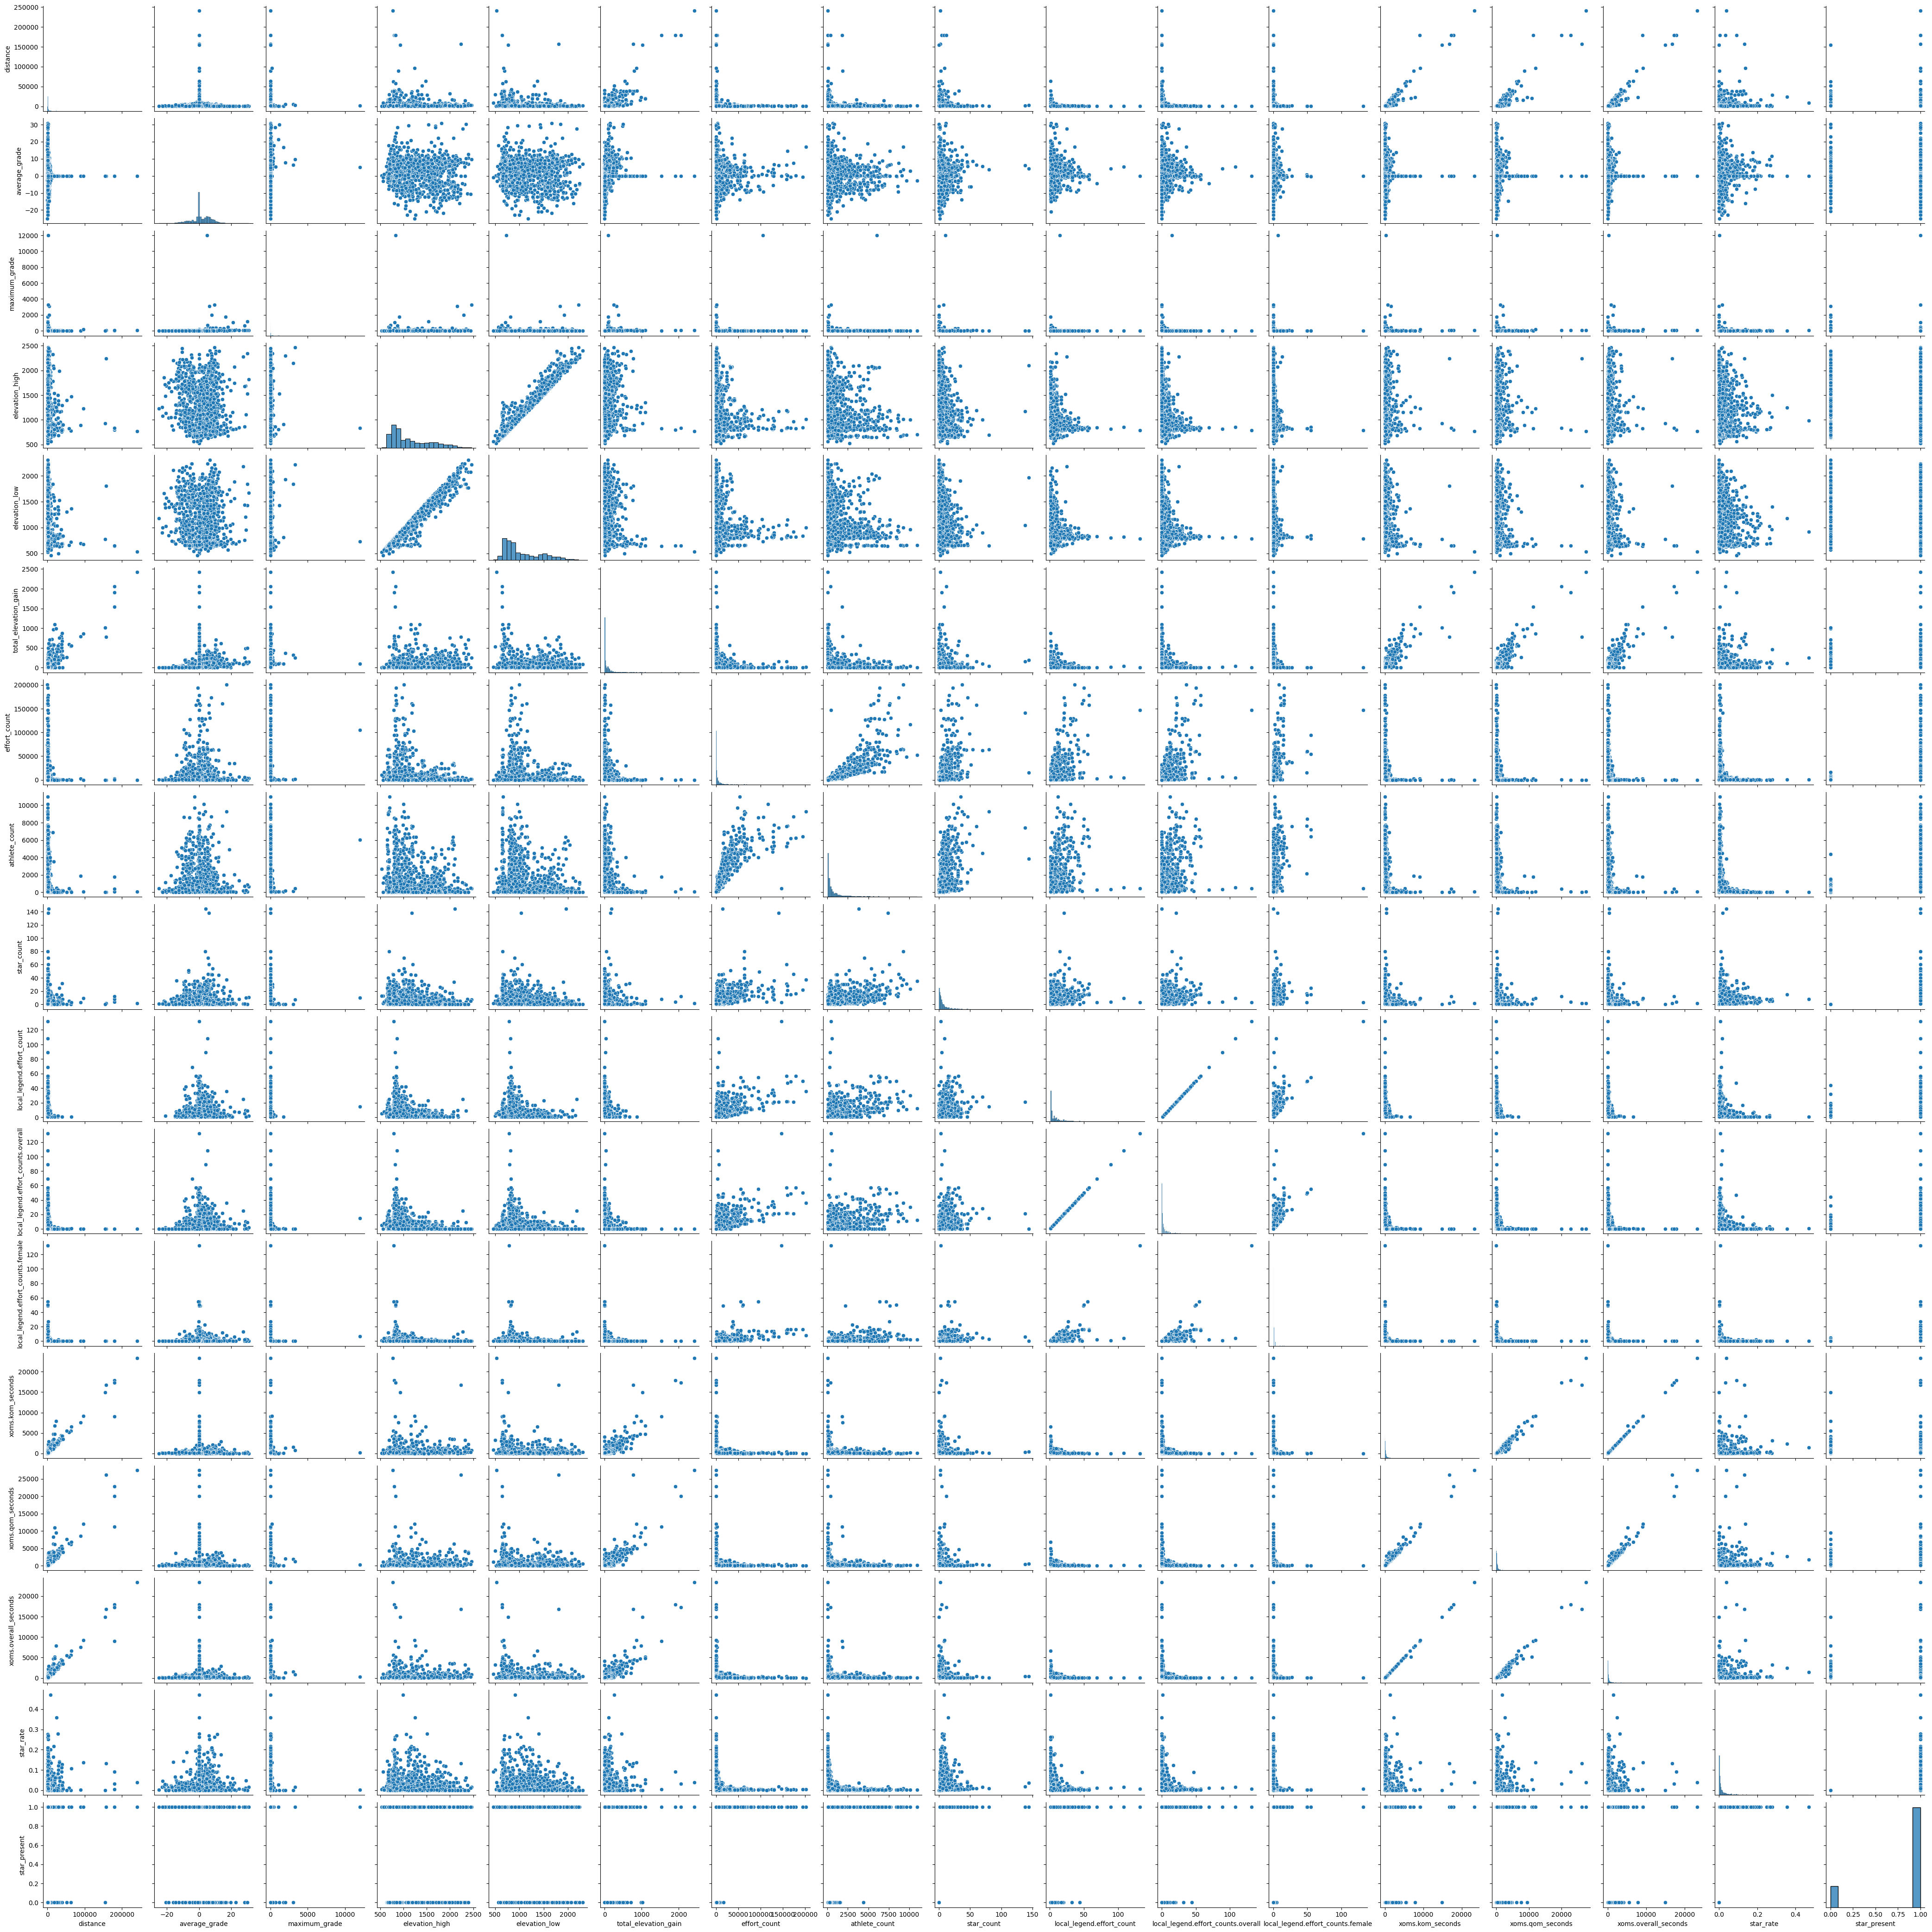

In [46]:
# Create pairplot from numeric df

sns.pairplot(strava_numeric_df)
plt.show()


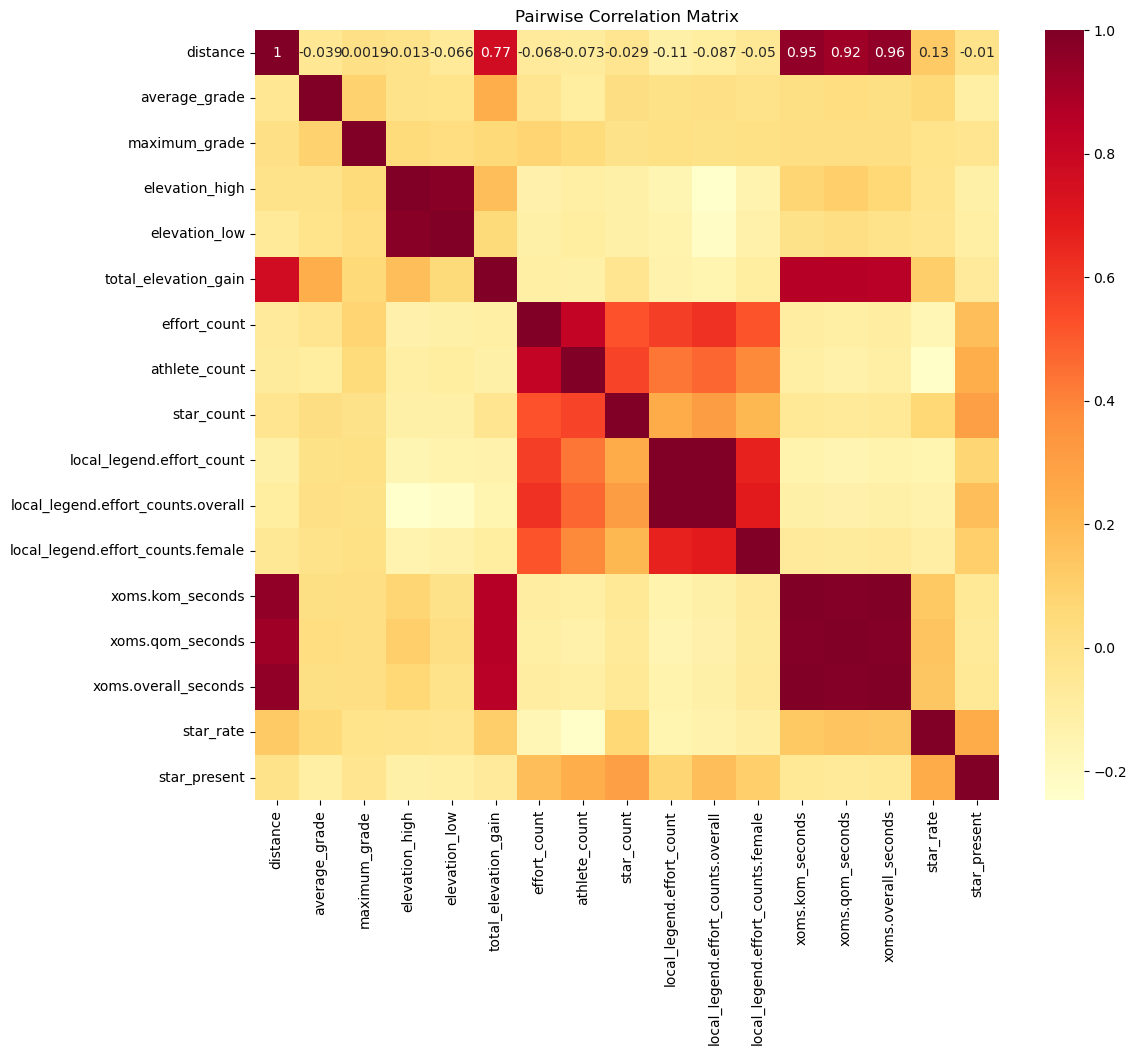

In [47]:
# Create the correlation matrix

corr_matrix = strava_numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Pairwise Correlation Matrix')
plt.show()


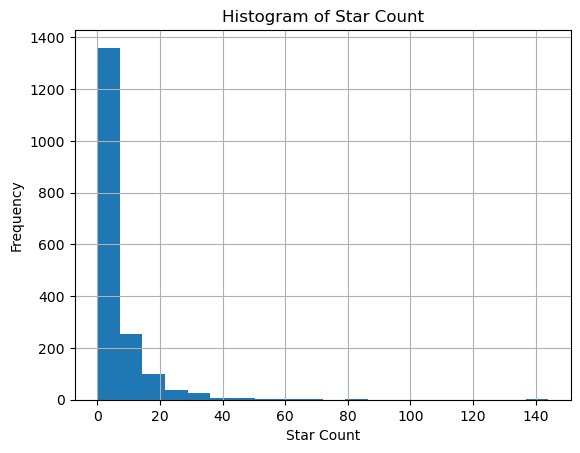

In [48]:
# Create the histogram of star count

plt.figure()
strava_numeric_df['star_count'].hist(bins=20)
plt.xlabel('Star Count')
plt.ylabel('Frequency')
plt.title('Histogram of Star Count')
plt.show()


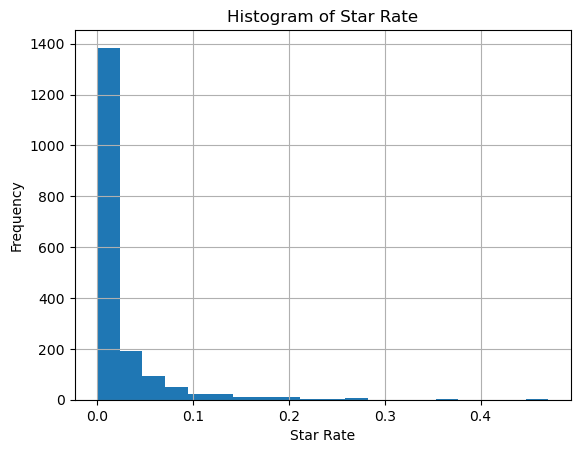

In [49]:
# Create the histogram of star rate

plt.figure()
strava_numeric_df['star_rate'].hist(bins=20)
plt.xlabel('Star Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Star Rate')
plt.show()


* This histogram has a lot of values in the 0 bin that aren't exactly 0 but near 0

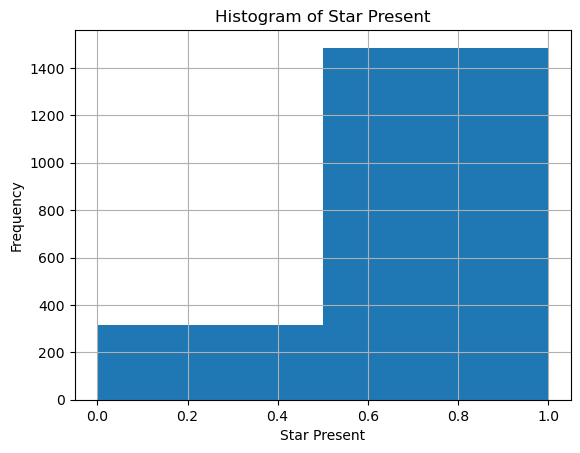

In [50]:
# Create the histogram of star present

plt.figure()
strava_numeric_df['star_present'].hist(bins=2)
plt.xlabel('Star Present')
plt.ylabel('Frequency')
plt.title('Histogram of Star Present')
plt.show()


In [51]:
strava_numeric_df.head()

,distance,average_grade,maximum_grade,elevation_high,elevation_low,total_elevation_gain,effort_count,athlete_count,star_count,local_legend.effort_count,local_legend.effort_counts.overall,local_legend.effort_counts.female,xoms.kom_seconds,xoms.qom_seconds,xoms.overall_seconds,star_rate,star_present
0,540.2,15.3,49.2,788.2,705.8,82.4,5819,600,5,3.0,3,1,35,46.0,35.0,0.008333,1
1,841.8,6.2,26.1,720.4,668.1,54.5,576,94,1,2.0,2,0,121,202.0,121.0,0.010638,1
2,899.2,5.9,14.7,1589.4,1535.9,53.6,1219,378,7,1.0,1,0,129,140.0,129.0,0.018519,1
3,1411.0,-12.4,31.1,1344.3,1165.4,7.1,1702,705,1,1.0,1,0,127,168.0,127.0,0.001418,1
4,1482.5,-0.2,1.6,780.5,776.7,0.0,7794,547,0,12.0,12,1,130,155.0,130.0,0.000000,0


In [52]:
# Null values for each column

strava_numeric_df.isnull().sum()

distance                                0
average_grade                           0
maximum_grade                           0
elevation_high                          0
elevation_low                           0
total_elevation_gain                    0
effort_count                            0
athlete_count                           0
star_count                              0
local_legend.effort_count             744
local_legend.effort_counts.overall      0
local_legend.effort_counts.female       0
xoms.kom_seconds                        0
xoms.qom_seconds                       21
xoms.overall_seconds                    3
star_rate                               0
star_present                            0
dtype: int64

In [53]:
# Preprocess data to throw out null values

# Throw out column local_legend.effort_count - too many null values

strava_numeric_df_no_null = strava_numeric_df.loc[:, strava_numeric_df.columns != 'local_legend.effort_count'].columns.tolist()
strava_numeric_df = strava_numeric_df[strava_numeric_df_no_null]

# Drop any rows with null values

strava_numeric_df = strava_numeric_df.dropna()

# Throw out star_count and star_rate because 
# they were used to derive star_present which is what we're predicting

strava_numeric_df_no_null = strava_numeric_df.loc[:, strava_numeric_df.columns != 'star_count'].columns.tolist()
strava_numeric_df = strava_numeric_df[strava_numeric_df_no_null]
strava_numeric_df_no_null = strava_numeric_df.loc[:, strava_numeric_df.columns != 'star_rate'].columns.tolist()
strava_numeric_df = strava_numeric_df[strava_numeric_df_no_null]

# Null values for each column

strava_numeric_df.isnull().sum()

distance                              0
average_grade                         0
maximum_grade                         0
elevation_high                        0
elevation_low                         0
total_elevation_gain                  0
effort_count                          0
athlete_count                         0
local_legend.effort_counts.overall    0
local_legend.effort_counts.female     0
xoms.kom_seconds                      0
xoms.qom_seconds                      0
xoms.overall_seconds                  0
star_present                          0
dtype: int64

In [54]:
strava_numeric_df_column_names = strava_numeric_df.columns.tolist()
print(strava_numeric_df_column_names)

['distance', 'average_grade', 'maximum_grade', 'elevation_high', 'elevation_low', 'total_elevation_gain', 'effort_count', 'athlete_count', 'local_legend.effort_counts.overall', 'local_legend.effort_counts.female', 'xoms.kom_seconds', 'xoms.qom_seconds', 'xoms.overall_seconds', 'star_present']


In [55]:
strava_numeric_df_no_target = strava_numeric_df.loc[:, strava_numeric_df.columns != 'star_present'].columns.tolist()
print(strava_numeric_df_no_target)

['distance', 'average_grade', 'maximum_grade', 'elevation_high', 'elevation_low', 'total_elevation_gain', 'effort_count', 'athlete_count', 'local_legend.effort_counts.overall', 'local_legend.effort_counts.female', 'xoms.kom_seconds', 'xoms.qom_seconds', 'xoms.overall_seconds']


In [56]:
# NOTE

print("NOTE!!!")
print("Remember to revaluate results like model accuracy, confusion matrix, and classification report if model changes.")

NOTE!!!
Remember to revaluate results like model accuracy, confusion matrix, and classification report if model changes.


Dataframe shapes:
X_train and y_train shapes: (1420, 7) (1420,)
X_test and y_test shapes: (355, 7) (355,)

Optimization terminated successfully.
         Current function value: 0.370085
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:           star_present   No. Observations:                 1420
Model:                          Logit   Df Residuals:                     1412
Method:                           MLE   Df Model:                            7
Date:                Thu, 25 Apr 2024   Pseudo R-squ.:                  0.2010
Time:                        16:31:39   Log-Likelihood:                -525.52
converged:                       True   LL-Null:                       -657.72
Covariance Type:            nonrobust   LLR p-value:                 2.390e-53
                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

<Figure size 640x480 with 0 Axes>

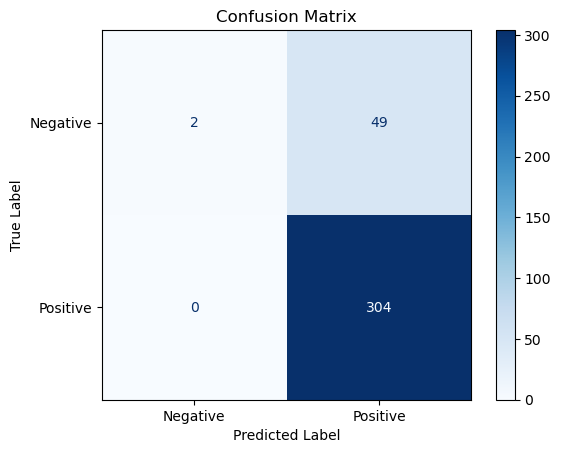


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.04      0.08        51
           1       0.86      1.00      0.93       304

    accuracy                           0.86       355
   macro avg       0.93      0.52      0.50       355
weighted avg       0.88      0.86      0.80       355



In [57]:
# First logit model

# This first model has errors because of the '.' in the column names fix
#model = logit('star_present ~ distance + average_grade + maximum_grade + elevation_high + elevation_low + total_elevation_gain + effort_count + local_legend.effort_count + local_legend.effort_counts.overall + local_legend.effort_counts.female + xoms.kom_seconds + xoms.qom_seconds + xoms.overall_seconds', data=strava_numeric_df).fit()

# Splitting data into testing and training data

X = strava_numeric_df[['distance', 'average_grade', 'maximum_grade', 'elevation_high', 'elevation_low', 'total_elevation_gain', 'effort_count']]
y = strava_numeric_df['star_present']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("Dataframe shapes:")
print("X_train and y_train shapes:", X_train.shape, y_train.shape)
print("X_test and y_test shapes:", X_test.shape, y_test.shape)
print()

# Fit the logistic regression model to only the training data

logit_model = logit('star_present ~ distance + average_grade + maximum_grade + elevation_high + elevation_low + total_elevation_gain + effort_count', data=strava_numeric_df.loc[y_train.index]).fit()

# Print the model summary

print(logit_model.summary())

# Evaluate the model on the training and testing data

print("\nAccuracy Scores:")

y_train_pred_proba = logit_model.predict(X_train)
y_train_pred = (y_train_pred_proba > 0.5).astype(int)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Logistic Regression Training Accuracy:", train_accuracy)

y_test_pred_proba = logit_model.predict(X_test)
y_test_pred = (y_test_pred_proba > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Logistic Regression Test Accuracy:", test_accuracy)

# Calculate confusion matrix

cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Create confusion matrix display

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Negative", "Positive"])

# Plot confusion matrix

plt.figure()
disp.plot(cmap = "Blues", xticks_rotation = "horizontal")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))

* Classification report above indicates that the model is really bad at predicting 0's and fairly good at predicting 1's

Dataframe shapes:
X_train and y_train shapes: (1420, 2) (1420,)
X_test and y_test shapes: (355, 2) (355,)

Optimization terminated successfully.
         Current function value: 0.372600
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:           star_present   No. Observations:                 1420
Model:                          Logit   Df Residuals:                     1417
Method:                           MLE   Df Model:                            2
Date:                Thu, 25 Apr 2024   Pseudo R-squ.:                  0.1956
Time:                        16:31:40   Log-Likelihood:                -529.09
converged:                       True   LL-Null:                       -657.72
Covariance Type:            nonrobust   LLR p-value:                 1.378e-56
                    coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

<Figure size 640x480 with 0 Axes>

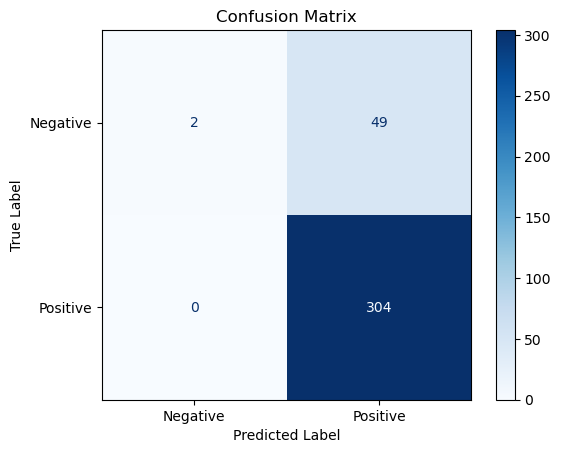


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.04      0.08        51
           1       0.86      1.00      0.93       304

    accuracy                           0.86       355
   macro avg       0.93      0.52      0.50       355
weighted avg       0.88      0.86      0.80       355



In [58]:
#Second logit

# Splitting data into testing and training data

X = strava_numeric_df[['average_grade', 'effort_count']]
y = strava_numeric_df['star_present']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("Dataframe shapes:")
print("X_train and y_train shapes:", X_train.shape, y_train.shape)
print("X_test and y_test shapes:", X_test.shape, y_test.shape)
print()

# Fit the logistic regression model to only the training data

logit_model = logit('star_present ~ average_grade + effort_count', data=strava_numeric_df.loc[y_train.index]).fit()

# Print the model summary

print(logit_model.summary())

# Evaluate the model on the training and testing data

print("\nAccuracy Scores:")

y_train_pred_proba = logit_model.predict(X_train)
y_train_pred = (y_train_pred_proba > 0.5).astype(int)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Logistic Regression Training Accuracy:", train_accuracy)

y_test_pred_proba = logit_model.predict(X_test)
y_test_pred = (y_test_pred_proba > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Logistic Regression Test Accuracy:", test_accuracy)

# Calculate confusion matrix

cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Create confusion matrix display

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Negative", "Positive"])

# Plot confusion matrix

plt.figure()
disp.plot(cmap = "Blues", xticks_rotation = "horizontal")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))

* Classification report above indicates that this model is slightly better but stillmax_iter really bad at predicting 0's and fairly good at predicting 1's

Dataframe shapes:
X_train and y_train shapes: (1242, 13) (1242,)
X_test and y_test shapes: (533, 13) (533,)

Accuracy Scores:
Logistic Regression Training Accuracy: 0.8276972624798712
Logistic Regression Test Accuracy: 0.849906191369606

Confusion Matrix:
[[  8  74]
 [  6 445]]


<Figure size 640x480 with 0 Axes>

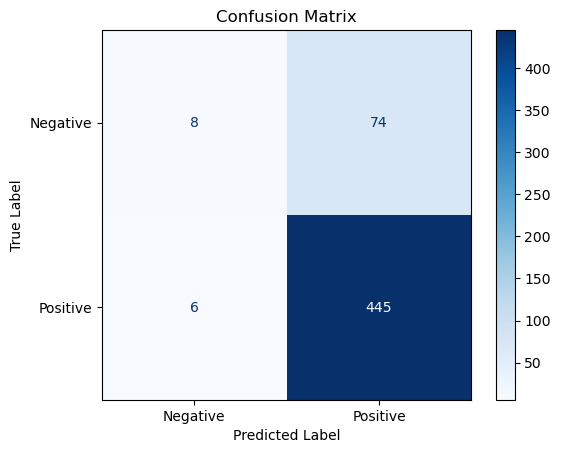


Classification Report:

              precision    recall  f1-score   support

           0       0.57      0.10      0.17        82
           1       0.86      0.99      0.92       451

    accuracy                           0.85       533
   macro avg       0.71      0.54      0.54       533
weighted avg       0.81      0.85      0.80       533



In [59]:
# Third logit model using all column data with no null values - sklearn logit model

# Splitting data into testing and training data

strava_numeric_df_no_target = strava_numeric_df.loc[:, strava_numeric_df.columns != 'star_present'].columns.tolist()
X = strava_numeric_df[strava_numeric_df_no_target]
#X = strava_numeric_df[['distance', 'average_grade', 'maximum_grade', 'elevation_high', 'elevation_low', 'total_elevation_gain', 'effort_count']]
y = strava_numeric_df['star_present']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Dataframe shapes:")
print("X_train and y_train shapes:", X_train.shape, y_train.shape)
print("X_test and y_test shapes:", X_test.shape, y_test.shape)
print()

# Fit the logistic regression model to the training data

logit_model = LogisticRegression(max_iter = 1000)
logit_model.fit(X_train, y_train)

# Evaluate the model on the training and testing data

print("Accuracy Scores:")

y_train_pred = logit_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Logistic Regression Training Accuracy:", train_accuracy)

y_test_pred = logit_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Logistic Regression Test Accuracy:", test_accuracy)

# Calculate confusion matrix

cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Create confusion matrix display

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Negative", "Positive"])

# Plot confusion matrix

plt.figure()
disp.plot(cmap = "Blues", xticks_rotation = "horizontal")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


* This is the best model so far. It's recall is still pretty bad for predicting 0.

Dataframe shapes:
X_train and y_train shapes: (1242, 13) (1242,)
X_test and y_test shapes: (533, 13) (533,)

Results of looping to find best k:
Best value of k: 15
Best accuracy score: 0.8365623785464438

Accuracy Scores:
KNN Training Accuracy: 0.8510466988727858
KNN Test Accuracy: 0.8405253283302064

Confusion Matrix:
[[ 10  72]
 [ 13 438]]


<Figure size 640x480 with 0 Axes>

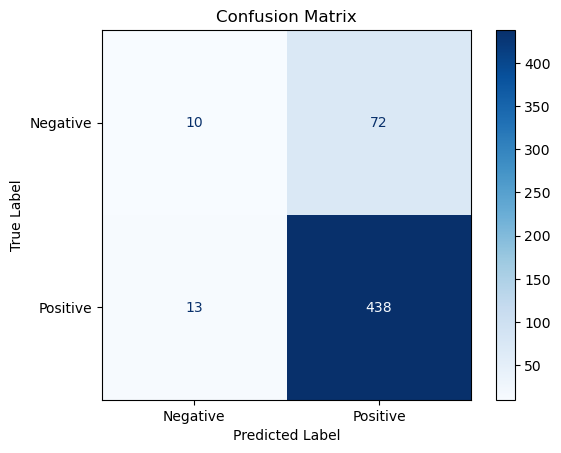


Classification Report:

              precision    recall  f1-score   support

           0       0.43      0.12      0.19        82
           1       0.86      0.97      0.91       451

    accuracy                           0.84       533
   macro avg       0.65      0.55      0.55       533
weighted avg       0.79      0.84      0.80       533



In [60]:
# KNN Classifier model

# Splitting data into testing and training data

strava_numeric_df_no_target = strava_numeric_df.loc[:, strava_numeric_df.columns != 'star_present'].columns.tolist()
X = strava_numeric_df[strava_numeric_df_no_target]
#X = strava_numeric_df[['distance', 'average_grade', 'maximum_grade', 'elevation_high', 'elevation_low', 'total_elevation_gain', 'effort_count']]
y = strava_numeric_df['star_present']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Dataframe shapes:")
print("X_train and y_train shapes:", X_train.shape, y_train.shape)
print("X_test and y_test shapes:", X_test.shape, y_test.shape)
print()

# Find best k to be set for model

best_k = 0
best_score = 0

# Loop through different values of k from 1 to 99

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring = "accuracy")
    
    # Calculate the mean accuracy score
    
    mean_score = scores.mean()
    
    # Update the best k and best score if necessary
    
    if mean_score > best_score:
        best_k = k
        best_score = mean_score
        
print("Results of looping to find best k:")
print("Best value of k:", best_k)
print("Best accuracy score:", best_score)

# Fit the KNN Classifier to the training data

set_n_neighbors = best_k
knn_model = KNeighborsClassifier(n_neighbors = set_n_neighbors)
knn_model.fit(X_train, y_train)

# Evaluate the model on the training and testing data

print("\nAccuracy Scores:")

y_train_pred = knn_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("KNN Training Accuracy:", train_accuracy)

y_test_pred = knn_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("KNN Test Accuracy:", test_accuracy)

# Calculate confusion matrix

cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Create confusion matrix display

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Negative", "Positive"])

# Plot confusion matrix

plt.figure()
disp.plot(cmap = "Blues", xticks_rotation = "horizontal")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


* This is model is alright.

Dataframe shapes:
X_train and y_train shapes: (1242, 13) (1242,)
X_test and y_test shapes: (533, 13) (533,)

Accuracy Scores:
SVM Training Accuracy: 0.8252818035426731
SVM Test Accuracy: 0.8461538461538461

Confusion Matrix:
[[  0  82]
 [  0 451]]


<Figure size 640x480 with 0 Axes>

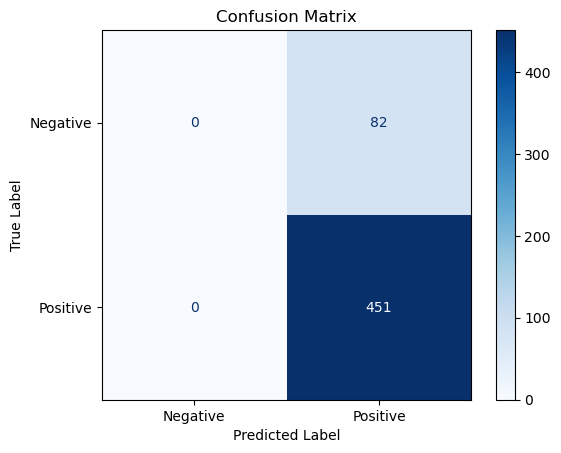


Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.85      1.00      0.92       451

    accuracy                           0.85       533
   macro avg       0.42      0.50      0.46       533
weighted avg       0.72      0.85      0.78       533



C:\Users\plumz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\plumz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\plumz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
# Support Vector Machines

# Splitting data into testing and training data

strava_numeric_df_no_target = strava_numeric_df.loc[:, strava_numeric_df.columns != 'star_present'].columns.tolist()
X = strava_numeric_df[strava_numeric_df_no_target]
#X = strava_numeric_df[['distance', 'average_grade', 'maximum_grade', 'elevation_high', 'elevation_low', 'total_elevation_gain', 'effort_count']]
y = strava_numeric_df['star_present']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Dataframe shapes:")
print("X_train and y_train shapes:", X_train.shape, y_train.shape)
print("X_test and y_test shapes:", X_test.shape, y_test.shape)
print()

# Fit the SVM model

#svm_model = SVC(kernel = "rbf", C = 0.1, gamma = 0.1) # for if the data is nonlinear?
svm_model = SVC() # for if the data is linear
svm_model.fit(X_train, y_train)

# Evaluate the model on the training and testing data

print("Accuracy Scores:")

y_train_pred = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("SVM Training Accuracy:", train_accuracy)

y_test_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("SVM Test Accuracy:", test_accuracy)

# Calculate confusion matrix

cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Create confusion matrix display

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Negative", "Positive"])

# Plot confusion matrix

plt.figure()
disp.plot(cmap = "Blues", xticks_rotation = "horizontal")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


Epoch 1/50
78/78 [==============================] - 1s 5ms/step - loss: 39.1125 - accuracy: 0.7874 - val_loss: 12.2512 - val_accuracy: 0.7711 - lr: 0.1000
Epoch 2/50
78/78 [==============================] - 0s 3ms/step - loss: 5.7892 - accuracy: 0.7713 - val_loss: 1.9364 - val_accuracy: 0.8349 - lr: 0.1000
Epoch 3/50
75/78 [===========================>..] - ETA: 0s - loss: 1.8889 - accuracy: 0.8000
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.05000000074505806.
78/78 [==============================] - 0s 5ms/step - loss: 1.8351 - accuracy: 0.8027 - val_loss: 3.5227 - val_accuracy: 0.8462 - lr: 0.1000
Epoch 4/50
78/78 [==============================] - 0s 3ms/step - loss: 2.2387 - accuracy: 0.8140 - val_loss: 1.6405 - val_accuracy: 0.8330 - lr: 0.0500
Epoch 5/50
78/78 [==============================] - ETA: 0s - loss: 1.3872 - accuracy: 0.8076
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.02500000037252903.
78/78 [==============================] - 0s 3ms/step - loss: 

<Figure size 640x480 with 0 Axes>

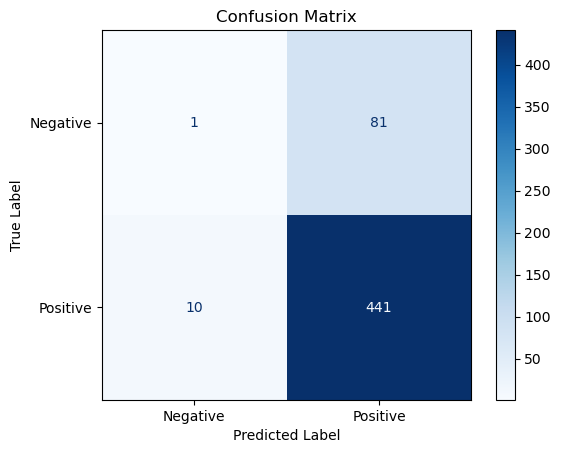


Classification Report:

              precision    recall  f1-score   support

           0       0.09      0.01      0.02        82
           1       0.84      0.98      0.91       451

    accuracy                           0.83       533
   macro avg       0.47      0.50      0.46       533
weighted avg       0.73      0.83      0.77       533



In [62]:
# First Neural Network

# Load the dataset

strava_numeric_df_no_target = strava_numeric_df.loc[:, strava_numeric_df.columns != 'star_present'].columns.tolist()
X = strava_numeric_df[strava_numeric_df_no_target]
#X = strava_numeric_df[['distance', 'average_grade', 'maximum_grade', 'elevation_high', 'elevation_low', 'total_elevation_gain', 'effort_count']]
y = strava_numeric_df['star_present']

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the neural network model with Lasso regularization

NN_model = Sequential()
NN_model.add(Dense(15, input_dim=X_train.shape[1], activation='relu'))
NN_model.add(Dense(1, activation='sigmoid'))

# Compile the model

chosen_optimizer = keras.optimizers.Adamax(learning_rate = 0.1) # optimizer 
NN_model.compile(loss = 'binary_crossentropy', optimizer = chosen_optimizer, metrics = ['accuracy'])

# Train the model

learning_rate_reducer = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                          factor=0.5, 
                                                          patience=1, 
                                                          verbose=1)

NN_model.fit(X_train, y_train, epochs = 50, batch_size = 16, callbacks = [learning_rate_reducer], validation_data=(X_test, y_test))

# Make predictions

y_train_pred = NN_model.predict(X_train)
y_test_pred = NN_model.predict(X_test)

# Print out values

"""
print("\ny_train:\n", y_train)
print("\ny_train_pred:\n", y_train_pred)
print("\ny_test:\n", y_test)
print("\ny_test_pred:\n", y_test_pred)
"""

# Evaluate the model on the training and testing data

print("Accuracy Scores:")

y_train_pred = (y_train_pred > 0.5).astype("int32")
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Neural Network Training Accuracy:", train_accuracy)

y_test_pred = (y_test_pred > 0.5).astype("int32")
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Neural Network Test Accuracy:", test_accuracy)

# Print out values

"""
print("\ny_train:\n", y_train)
print("\ny_train_pred:\n", y_train_pred)
print("\ny_test:\n", y_test)
print("\ny_test_pred:\n", y_test_pred)
"""

# Calculate confusion matrix

cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Create confusion matrix display

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Negative", "Positive"])

# Plot confusion matrix

plt.figure()
disp.plot(cmap="Blues", xticks_rotation="horizontal")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


* There seems to be an early convergence problem.

In [63]:
# Testing for best Neural Network optimizer

from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Nadam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Load the dataset

strava_numeric_df_no_target = strava_numeric_df.loc[:, strava_numeric_df.columns != 'star_present'].columns.tolist()
X = strava_numeric_df[strava_numeric_df_no_target]
#X = strava_numeric_df[['distance', 'average_grade', 'maximum_grade', 'elevation_high', 'elevation_low', 'total_elevation_gain', 'effort_count']]
y = strava_numeric_df['star_present']

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the neural network model with Lasso regularization

NN_model = Sequential()
NN_model.add(Dense(15, input_dim=X_train.shape[1], activation='relu'))
NN_model.add(Dense(1, activation='sigmoid'))

# Try different optimizers

optimizers = {
    'SGD': SGD(learning_rate=0.01),
    'Adagrad': Adagrad(learning_rate=0.01),
    'Adadelta': Adadelta(learning_rate=1.0),
    'RMSprop': RMSprop(learning_rate=0.001),
    'Adam': Adam(learning_rate=0.001),
    'AdamW': Adam(learning_rate=0.001, weight_decay=0.01),
    'Nadam': Nadam(learning_rate=0.001),
}

for optimizer_name, optimizer in optimizers.items():
    print(f"Training with {optimizer_name} optimizer:")
    
    # Compile the model with the current optimizer
    
    NN_model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
    
    # Train the model
    
    NN_model.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose = 0)
    
    # Evaluate the model
    
    loss, accuracy = NN_model.evaluate(X_test, y_test, verbose = 0)
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)
    print()

Training with SGD optimizer:
Test Loss: 0.43096306920051575
Test Accuracy: 0.8461538553237915

Training with Adagrad optimizer:
Test Loss: 0.43088167905807495
Test Accuracy: 0.8461538553237915

Training with Adadelta optimizer:
Test Loss: 0.4308312237262726
Test Accuracy: 0.8461538553237915

Training with RMSprop optimizer:
Test Loss: 0.43081650137901306
Test Accuracy: 0.8461538553237915

Training with Adam optimizer:
Test Loss: 0.4307975172996521
Test Accuracy: 0.8461538553237915

Training with AdamW optimizer:
Test Loss: 0.4310733377933502
Test Accuracy: 0.8461538553237915

Training with Nadam optimizer:
Test Loss: 0.43085548281669617
Test Accuracy: 0.8461538553237915



Dataframe shapes:
X_train and y_train shapes: (1242, 13) (1242,)
X_test and y_test shapes: (533, 13) (533,)

Accuracy Scores:
Random Forest Training Accuracy: 0.9782608695652174
Random Forest Test Accuracy: 0.8574108818011257

Confusion Matrix:
[[ 18  64]
 [ 12 439]]


<Figure size 640x480 with 0 Axes>

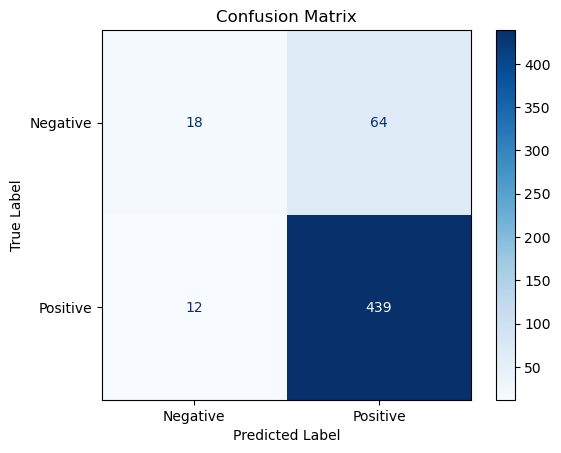


Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.22      0.32        82
           1       0.87      0.97      0.92       451

    accuracy                           0.86       533
   macro avg       0.74      0.60      0.62       533
weighted avg       0.83      0.86      0.83       533



In [64]:
# Random Forest Classifier

# Splitting data into testing and training data

strava_numeric_df_no_target = strava_numeric_df.loc[:, strava_numeric_df.columns != 'star_present'].columns.tolist()
X = strava_numeric_df[strava_numeric_df_no_target]
#X = strava_numeric_df[['distance', 'average_grade', 'maximum_grade', 'elevation_high', 'elevation_low', 'total_elevation_gain', 'effort_count']]
y = strava_numeric_df['star_present']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print("Dataframe shapes:")
print("X_train and y_train shapes:", X_train.shape, y_train.shape)
print("X_test and y_test shapes:", X_test.shape, y_test.shape)
print()

# Fit the Random Forest Classifier to the training data

set_n_estimators = 100
set_max_features = "sqrt"
set_max_depth = 10
RFC_model = RandomForestClassifier(n_estimators = set_n_estimators, max_features = set_max_features, max_depth = set_max_depth, random_state = 0)
RFC_model.fit(X_train, y_train)

# Evaluate the model on the training and testing data

print("Accuracy Scores:")

y_train_pred = RFC_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Random Forest Training Accuracy:", train_accuracy)

y_test_pred = RFC_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Random Forest Test Accuracy:", test_accuracy)

# Calculate confusion matrix

cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Create confusion matrix display

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Negative", "Positive"])

# Plot confusion matrix

plt.figure()
disp.plot(cmap = "Blues", xticks_rotation = "horizontal")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


* This is the best model so far but it is overfitting.

Dataframe shapes:
X_train and y_train shapes: (1242, 13) (1242,)
X_test and y_test shapes: (533, 13) (533,)


Accuracy Scores:
Decision Tree Training Accuracy: 0.8518518518518519
Decision Tree Test Accuracy: 0.8461538461538461

Confusion Matrix:
[[  8  74]
 [  8 443]]


<Figure size 640x480 with 0 Axes>

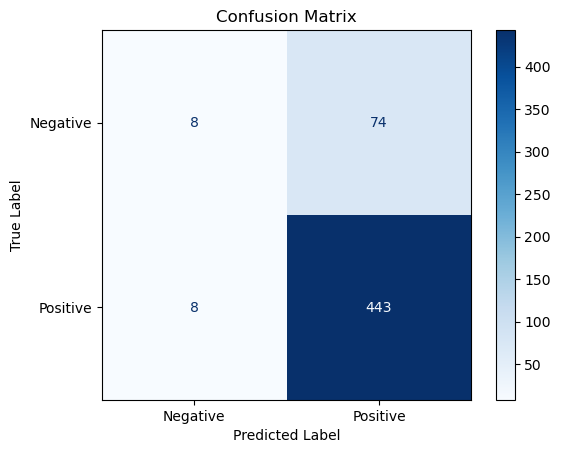


Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.10      0.16        82
           1       0.86      0.98      0.92       451

    accuracy                           0.85       533
   macro avg       0.68      0.54      0.54       533
weighted avg       0.80      0.85      0.80       533



In [65]:
# Basic decision tree

# Splitting data into testing and training data

strava_numeric_df_no_target = strava_numeric_df.loc[:, strava_numeric_df.columns != 'star_present'].columns.tolist()
X = strava_numeric_df[strava_numeric_df_no_target]
#X = strava_numeric_df[['distance', 'average_grade', 'maximum_grade', 'elevation_high', 'elevation_low', 'total_elevation_gain', 'effort_count']]
y = strava_numeric_df['star_present']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Dataframe shapes:")
print("X_train and y_train shapes:", X_train.shape, y_train.shape)
print("X_test and y_test shapes:", X_test.shape, y_test.shape)
print()

# Fit the Decision Tree Classifier to the training data

set_criterion = "gini" # 'gini', 'log_loss', 'entropy'
set_max_depth = 3
set_min_samples_leaf = 20
DTC_model = DecisionTreeClassifier(criterion = set_criterion, max_depth = set_max_depth, random_state = 0)
DTC_model.fit(X_train, y_train)

# Evaluate the model on the training and testing data

print("\nAccuracy Scores:")

y_train_pred = DTC_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Decision Tree Training Accuracy:", train_accuracy)

y_test_pred = DTC_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Decision Tree Test Accuracy:", test_accuracy)

# Calculate confusion matrix

cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Create confusion matrix display

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["Negative", "Positive"])

# Plot confusion matrix

plt.figure()
disp.plot(cmap = "Blues", xticks_rotation = "horizontal")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


* This model is overfitting. One thing to note is the gini impurity criterion is the best of the three available - I don't know if this is significant.

In [68]:
# Examine structure of the decsion tree to see how classifications are made

DTC_model_text = export_text(DTC_model, feature_names = strava_numeric_df.loc[:, strava_numeric_df.columns != 'star_present'].columns.tolist())
print(type(DTC_model_text))
print("Decision Tree:\n", DTC_model_text)


<class 'str'>
Decision Tree:
 |--- effort_count <= 441.50
|   |--- athlete_count <= 27.50
|   |   |--- elevation_high <= 1511.90
|   |   |   |--- class: 1
|   |   |--- elevation_high >  1511.90
|   |   |   |--- class: 0
|   |--- athlete_count >  27.50
|   |   |--- effort_count <= 430.00
|   |   |   |--- class: 1
|   |   |--- effort_count >  430.00
|   |   |   |--- class: 0
|--- effort_count >  441.50
|   |--- effort_count <= 2351.50
|   |   |--- elevation_low <= 1164.85
|   |   |   |--- class: 1
|   |   |--- elevation_low >  1164.85
|   |   |   |--- class: 1
|   |--- effort_count >  2351.50
|   |   |--- elevation_high <= 2214.20
|   |   |   |--- class: 1
|   |   |--- elevation_high >  2214.20
|   |   |   |--- class: 0



## Conclusion

##### Note: Verify each conclusion
* The best models were the logit, KNN, random forest, and decision tree.
    * The great thing about the decison tree is that it is a model that is very easy to interpret.
* The neural network did not work well. 
    * It seemed to converge too quickly and to be overfitting the training data because the model appeared to be too complex for the data.
* The decision tree and random forest models overfitted the training data easily.
    * Reducing the max_depth of these models helped to reduce their overfitting.
* To raise the accuracy of the models, I think more data is required.
    * This seems to be supported by the fact that when I increased the number of samples in the training set (I had to reduce the test dataset to do so) the models generally learned better. 
    * I hypertuned a lot of the possible hyperparameters for each of the models, and I had difficulty increasing the accuracy beyond what was achieved.
* As of now, the features with the most predictive power when predicting star_present seem to be effort_count, athlete_count, and elevation_high as indicated by the structure of the best created decision tree. 